<a href="https://colab.research.google.com/github/ReVuz/R_programming/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA on "Titanic Dataset"

You are given the Titanic dataset, which contains information about passengers on the Titanic, including their survival status, age, class, and gender.

a)plot the histogram of Number of parents and children of the passenger aboard(parch).

b)Perform a detailed EDA, including advanced statistical analysis, to explore factors influencing survival rates.

c)Create a customized box plot to visualize the age distribution of survivors and non-survivors.

In [ ]:
install.packages("survminer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘markdown’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’


Warning message in install.packages("survminer"):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages("survminer"):
“installation of package ‘rstatix’ had non-zero exit status”
Warning message in install.packages("survminer"):
“installation of package ‘ggpubr’ had non-zero exit status”
Warning message in install.packages("survminer"):
“installation of package ‘survminer’ had non-zero exit status”


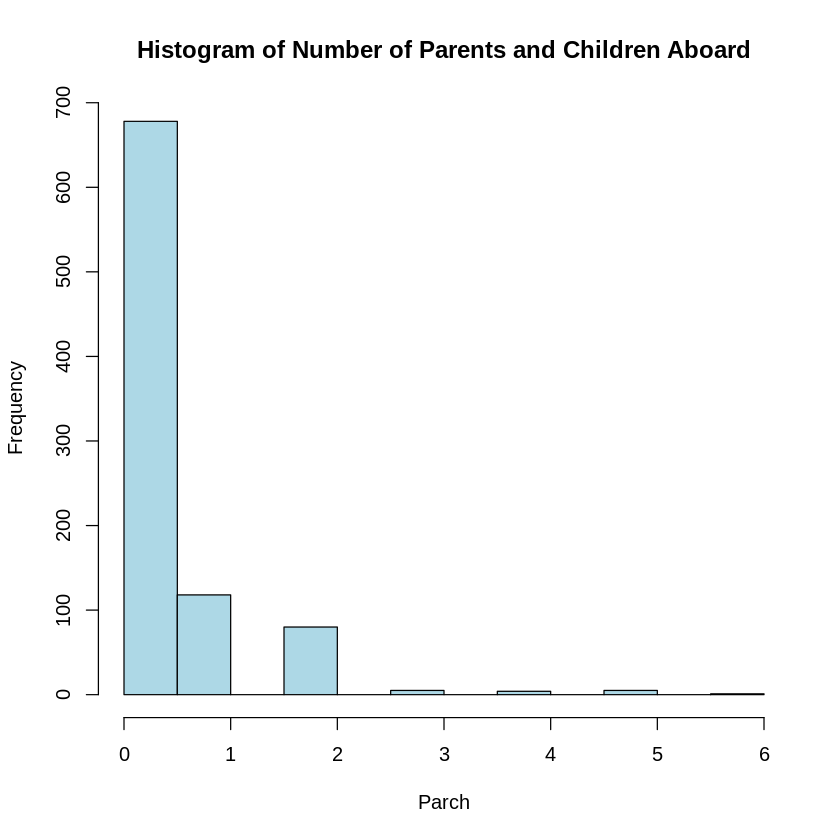

In [54]:
# plot the histogram of Number of parents and children of the passenger aboard(parch)

Titanic_df <- read.csv("titanic.csv")

# Convert 'Parch' to numeric
Titanic_df$Parch <- as.numeric(as.character(Titanic_df$Parch))

# Create the histogram
hist(Titanic_df$Parch, main = "Histogram of Number of Parents and Children Aboard",
     xlab = "Parch", col = "lightblue")


In [50]:
# Perform a detailed EDA, including advanced statistical analysis, to explore factors influencing survival rates.

# Load the dplyr and ggplot2 packages
library(dplyr)
library(ggplot2)

# Summarize the survival rates by class, sex, and age group
Titanic_df %>%
  group_by(Pclass, Sex, Age) %>%
  summarise(Survived = sum(Survived), Total = n(), Rate = Survived / Total) %>%
  ungroup()

`summarise()` has grouped output by 'Pclass', 'Sex'. You can override using the
`.groups` argument.


Pclass,Sex,Age,Survived,Total,Rate
<int>,<chr>,<dbl>,<int>,<int>,<dbl>
1,female,2,0,1,0
1,female,14,1,1,1
1,female,15,1,1,1
1,female,16,3,3,1
1,female,17,2,2,1
1,female,18,3,3,1
1,female,19,3,3,1
1,female,21,2,2,1
1,female,22,4,4,1


[1] 177

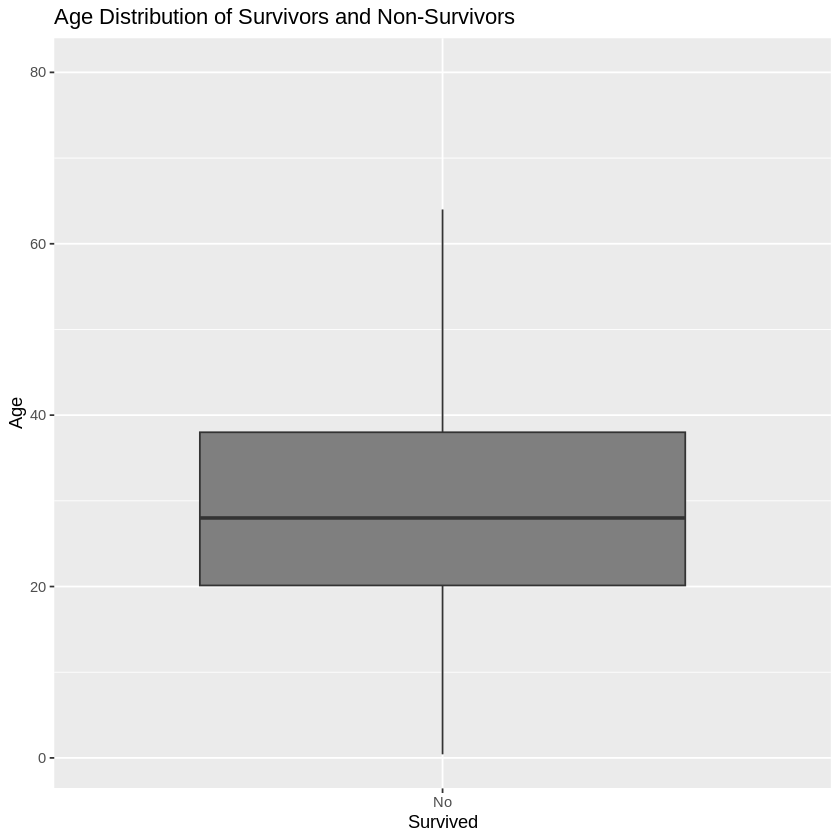

In [55]:
# Create a customized box plot to visualize the age distribution of survivors and non-survivors

# Load the ggplot2 package
library(ggplot2)

# Check for missing values in 'Age'
sum(is.na(Titanic_df$Age))

# Handle missing values (e.g., remove rows with missing 'Age')
Titanic_df <- na.omit(Titanic_df)

# Convert 'Survived' to a factor
Titanic_df$Survived <- factor(Titanic_df$Survived, levels = c("No", "Yes"))

# Create a customized box plot of age by survival
ggplot(Titanic_df, aes(x = Survived, y = Age, fill = Survived)) +
  geom_boxplot(outlier.shape = NA) + # Remove outliers
  scale_x_discrete(labels = c("No", "Yes")) + # Rename x-axis labels
  scale_fill_manual(values = c("red", "green")) + # Change fill colors
  labs(title = "Age Distribution of Survivors and Non-Survivors", x = "Survived", y = "Age")

2: EDA on "Iris Dataset"

a)For the Iris dataset, which contains measurements of various iris flowers, conduct  an EDA.

b) Determine if there are statistically significant differences in sepal lengths between            different species using a suitable statistical test.

c)Create a pair plot to visualize the relationships between all variables.

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

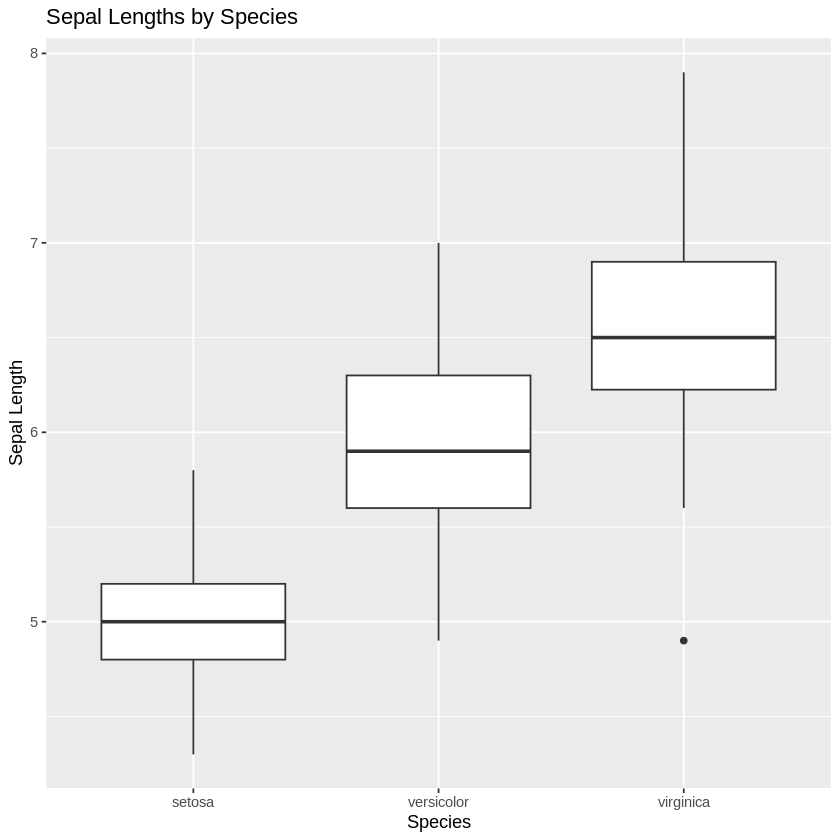

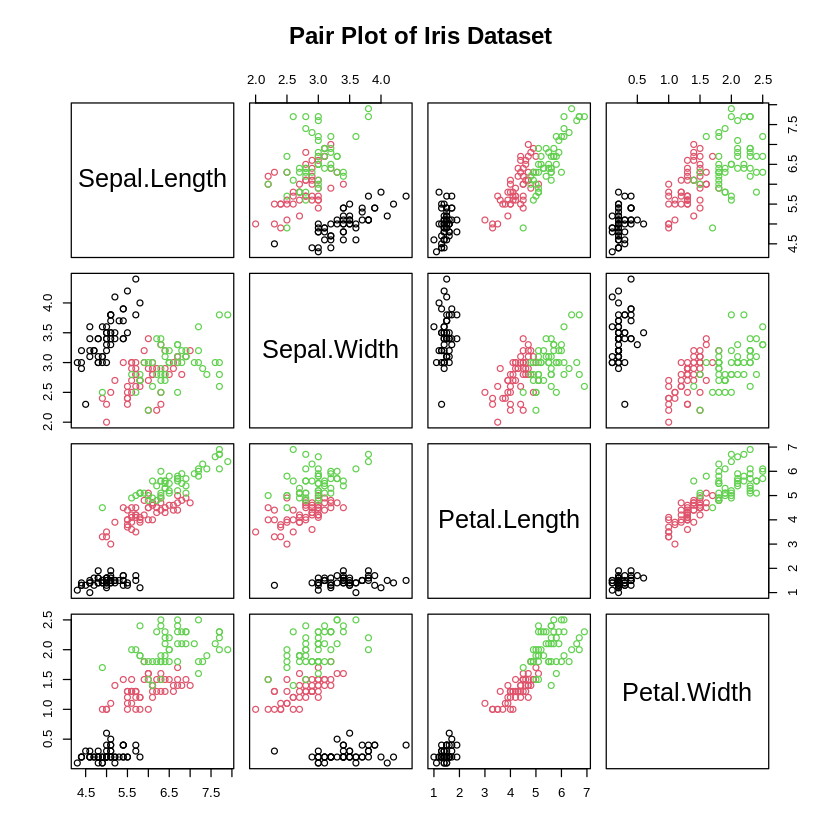

In [65]:
# For the Iris dataset, which contains measurements of various iris flowers, conduct an EDA

# Load necessary libraries
library(dplyr)
library(ggplot2)
library(stats)

# Load Iris dataset
data(iris)

# Display the structure of the dataset
str(iris)

# Summary statistics
summary(iris)

# Visualize Sepal Lengths by Species
ggplot(iris, aes(x = Species, y = Sepal.Length)) +
  geom_boxplot() +
  labs(title = "Sepal Lengths by Species", y = "Sepal Length")

# Pair plot
pairs(iris[, 1:4], col = iris$Species, main = "Pair Plot of Iris Dataset")

In [66]:
# Determine if there are statistically significant differences in sepal lengths between different species using a suitable statistical test

# ANOVA test to check for significant differences in sepal lengths between species
anova_result <- aov(Sepal.Length ~ Species, data = iris)
summary(anova_result)

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  63.21  31.606   119.3 <2e-16 ***
Residuals   147  38.96   0.265                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

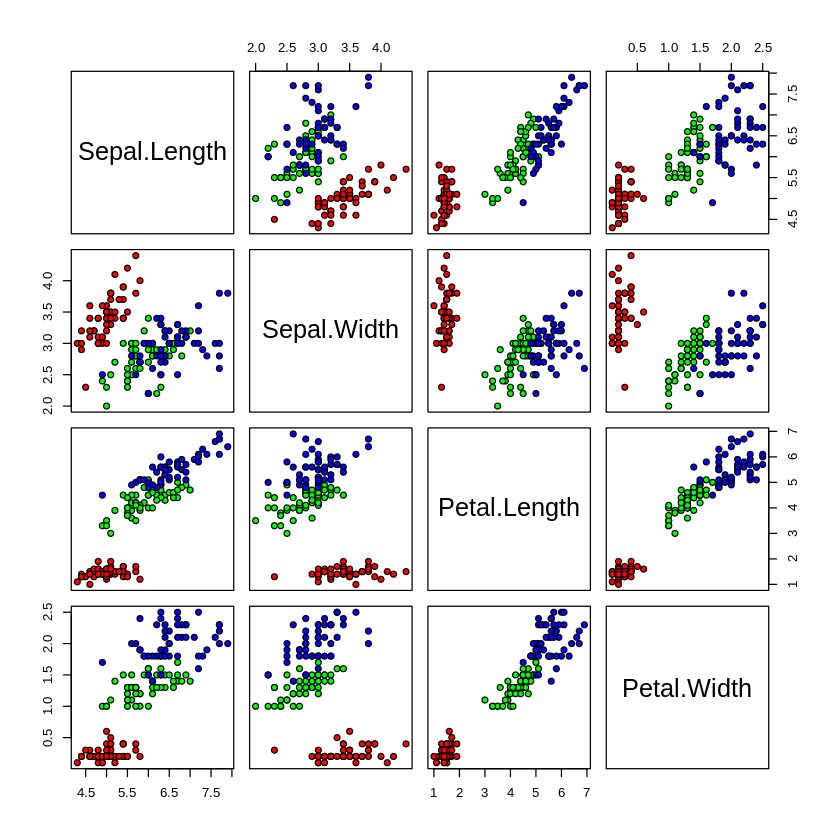

In [58]:
# Create a pair plot to visualize the relationships between all variables.

# Explore the relationship between the numeric variables using scatter plots
pairs(iris[, -5], pch = 21, bg = c("red", "green", "blue")[iris$Species])

In [59]:
# Determine if there are statistically significant differences in sepal lengths between different species using a suitable statistical test

# Perform a one-way ANOVA on sepal length by species
anova(lm(Sepal.Length ~ Species, data = iris))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Species,2,63.21213,31.6060667,119.2645,1.669669e-31
Residuals,147,38.95620,0.2650082,NA,NA


In [61]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’




`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


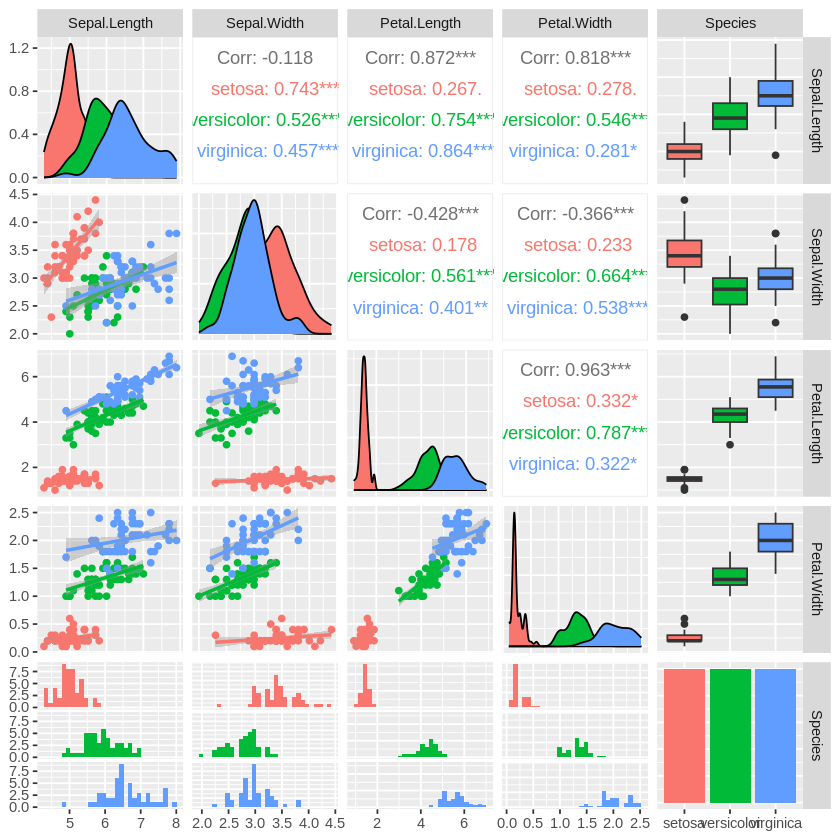

In [64]:
# Load the GGally package
library(GGally)

# Create a pair plot of all variables
ggpairs(iris, aes(color = Species), lower = list(continuous = "smooth"))